In [1]:
import os

# 기본 경로 설정
ROOT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(ROOT_DIR, "data")
IMAGE_DIR = os.path.join(DATA_DIR, "train_images")
ANNOT_DIR = os.path.join(DATA_DIR, "train_annotations")
FIXED_DIR = os.path.join(DATA_DIR, "train_annotations_fixed")

full_dict_path = os.path.join(DATA_DIR, "FULL_DICT.json")
err_txt_path = os.path.join(DATA_DIR, "err_image_paths.txt")
fixed_dict_path = os.path.join(DATA_DIR, "FIXED_DICT.json")  


json_name = "_annotations.coco.json"
json_path = os.path.join(ROOT_DIR, json_name)


import json

with open(os.path.join(ROOT_DIR, json_name), "r", encoding="utf-8") as f:
    j = json.load(f)

In [2]:
# roboflow에서 받은 annotation 파일을 streamlit에 넣기 전의 간단한 형태로 바꿉니다.

from collections import defaultdict

file_path = '/Users/won/dev/codeit/0_mission/100_DL_ObjectDetection/_annotations.coco.json'
with open(file_path, 'r', encoding='utf-8') as f:
    coco_data = json.load(f)

# 1. image_id와 image_name 매핑 생성
image_id_to_name = {}
for img_info in coco_data.get('images', []):
    image_id = img_info.get('id')
    # 'extra' 필드가 있고 그 안에 'name'이 있는지 확인. 없으면 기본값 사용
    image_name = img_info.get('extra', {}).get('name')
    if image_id is not None and image_name is not None:
        image_id_to_name[image_id] = image_name

# 2. image_name별로 annotation 데이터 정리
# defaultdict를 사용하면 키가 없을 때 자동으로 빈 리스트를 생성해줍니다.
grouped_data_by_image = defaultdict(list)

for annotation in coco_data.get('annotations', []):
    image_id = annotation.get('image_id')
    bbox = annotation.get('bbox') # [x, y, width, height]       형식
    
    if image_id is not None and bbox is not None:
        image_name = image_id_to_name.get(image_id, 'Unknown Image Name') # 이름이 없는 경우 기본값
        grouped_data_by_image[image_name].append({
            'label': None,
            'bbox': bbox
        })


with open(os.path.join(ROOT_DIR, json_name), "w", encoding="utf-8") as f:
    json.dump(grouped_data_by_image, f, indent=4)

In [ ]:
# # streamlit에서 수정한 어노테이션 파일을 토대로 data/train_annotation_fixed에 올바른 형태로 저장합니다.

# def processed_annot_to_fixed_folder():
#     pass

# file_path = os.path.join(ROOT_DIR, "_annotations_fixed.coco.json")

# with open(file_path, "r", encoding="utf-8") as f:
#     fixed_json = json.load(f)


# fixed_json[list(fixed_json.keys())[0]]

# for key, annot_list in fixed_json.items():
#     png_name = key
#     folder_name = f"{png_name.split('_0_2_0_2')[0]}_json"
#     file_name = png_name.replace(".png", ".json")

#     try:
#         os.makedirs(os.path.join(DATA_DIR, "train_annotations_fixed", folder_name))
#     except FileExistsError:
#         pass

#     for annot_dict in annot_list:
#         annot_dict["file_name"] = png_name.strip()
#         bbox = annot_dict["bbox"]
#         drug_N = annot_dict["drug_N"]

#         sub_folder_name = f"K-{drug_N}"
    
#         try:
#             os.makedirs(os.path.join(DATA_DIR, "train_annotations_fixed", folder_name, sub_folder_name))
#         except FileExistsError:
#             pass

#         fixed_json_name = os.path.join(DATA_DIR, "train_annotations_fixed", folder_name, sub_folder_name, file_name)

#         with open(fixed_json_name, "w", encoding="utf-8") as f:
#             del annot_dict["drug_N"]
#             json.dump(annot_dict, f, indent=4)
        

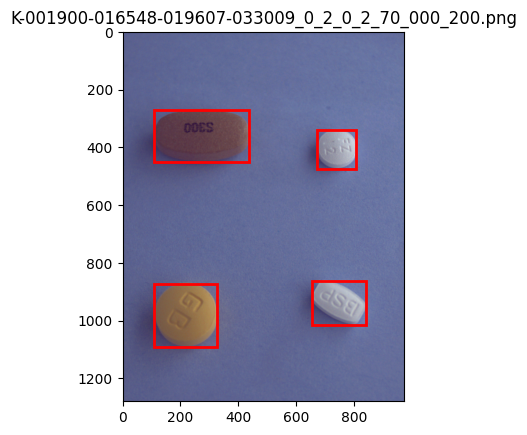

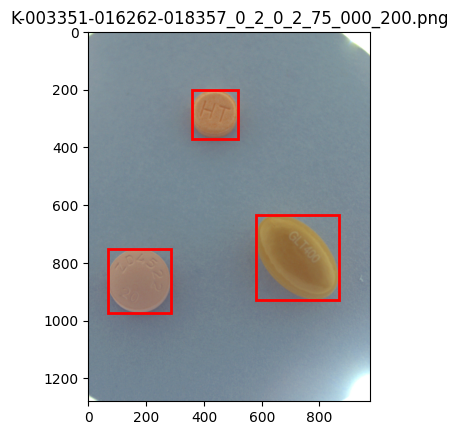

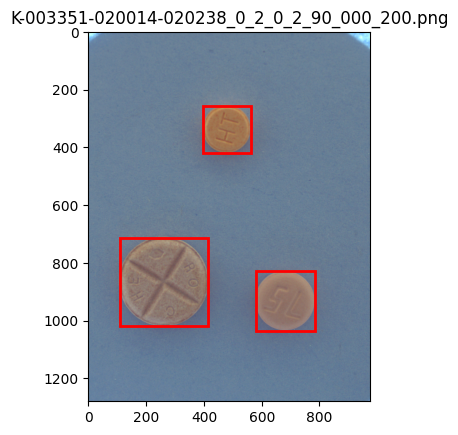

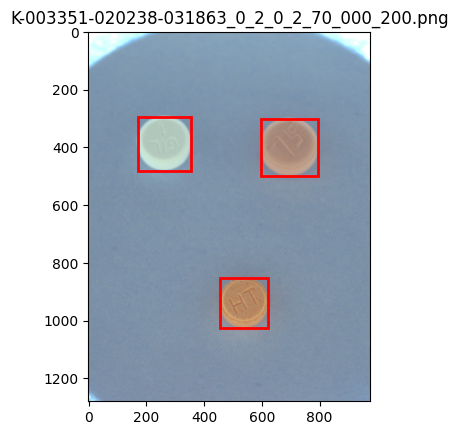

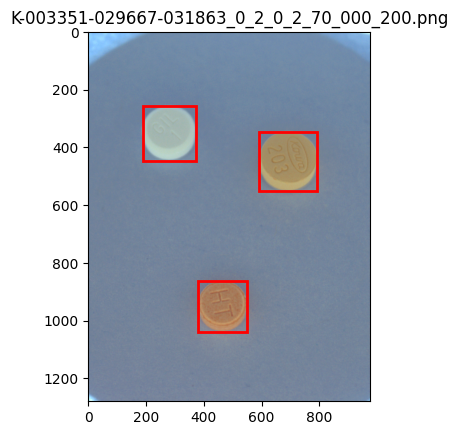

In [ ]:
# import os
# import json
# import torchvision
# import matplotlib.pyplot as plt
# from matplotlib import patches
# import random
# import data_management as dm

# def show_fixed_image(img_path):
#     pass

# FULL_DICT = dm.load_full_dict()
# err_image_paths = dm.load_err_image_paths()

# # 수정된 json 기반 이미지 출력

# for err_img in err_image_paths:
#     img_path = os.path.join(IMAGE_DIR, err_img.strip())
#     sample_bbox = []

#     for annot_path in FULL_DICT[err_img.strip()]:
#         with open(os.path.join(FIXED_DIR, annot_path), 'r', encoding='utf-8') as f:
#             json_data = json.load(f)
#         sample_bbox.append({
#                         "bbox": json_data["bbox"]})

#     image = torchvision.io.read_image(img_path).permute(1,2,0)

#     fig, ax = plt.subplots()

#     plt.imshow(image)
#     plt.title(err_img)

#     for bbox_dict in sample_bbox:
#         x, y, w, h = bbox_dict["bbox"][0], bbox_dict["bbox"][1], bbox_dict["bbox"][2], bbox_dict["bbox"][3]
#         rectangle = patches.Rectangle((x, y), w, h, color="red", fill=False, linewidth=2)
#         ax.add_patch(rectangle)

#     plt.show()